In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**hitters_processed** Veri Setinin Feature'ları (Özellikleri):

Aşağıda bu veri setinde yaygın olarak bulunan feature'ların (değişkenlerin) açıklamaları yer almaktadır:

**AtBat**: Oyuncunun bir sezonda sopayla vuruş yaptığı toplam sayı.

**Hits**: Oyuncunun bir sezonda yaptığı başarılı vuruş sayısı.

**HmRun**: Oyuncunun bir sezonda yaptığı "home run" sayısı (topu saha dışına vurarak tüm base'leri koşması).

**Runs**: Oyuncunun bir sezonda attığı toplam koşu sayısı.

**RBI**: "Runs Batted In" anlamına gelir. Oyuncunun vuruşlarıyla takımına kazandırdığı koşu sayısı.

**Walks**: Oyuncunun bir sezonda "walk" aldığı sayı (rakip pitcher'ın dört top atması sonucu oyuncunun birinci base'e yürümesi).

**Years**: Oyuncunun profesyonel ligde oynadığı yıl sayısı.

**CAtBat**: Oyuncunun kariyeri boyunca yaptığı toplam vuruş sayısı.

**CHits**: Oyuncunun kariyeri boyunca yaptığı toplam başarılı vuruş sayısı.

**CHmRun**: Oyuncunun kariyeri boyunca yaptığı toplam "home run" sayısı.

**CRuns**: Oyuncunun kariyeri boyunca attığı toplam koşu sayısı.

**CRBI**: Oyuncunun kariyeri boyunca vuruşlarıyla takımına kazandırdığı toplam koşu sayısı.

**CWalks**: Oyuncunun kariyeri boyunca aldığı toplam "walk" sayısı.

**League**: Oyuncunun oynadığı ligi gösteren kategorik bir değişkendir (örneğin, American League - A, National League - N).

**Division**: Oyuncunun oynadığı bölümü gösteren kategorik bir değişkendir (örneğin, East - E, West - W).

**NewLeague**: Oyuncunun sezon sonunda oynadığı yeni ligi gösteren kategorik bir değişkendir (örneğin, American League - A, National League - N).

**Salary**: Oyuncunun o sezondaki maaşı (genellikle bin dolar cinsinden). Bu, genellikle tahmin edilmeye çalışılan bağımlı değişkendir.

**CrAtBat**: Oyuncunun kariyerindeki vuruş sayısının, o sezondaki vuruş sayısından çıkarılmasıyla elde edilen bir özellik olabilir (bazı ön işlenmiş versiyonlarda görülebilir). Kariyerinin önceki dönemindeki vuruş tecrübesini temsil edebilir.

**CHits_ratio**: Oyuncunun kariyerindeki vuruş sayısının, kariyerindeki at-bat sayısına oranı olabilir (bazı ön işlenmiş versiyonlarda görülebilir). Vuruş yüzdesini temsil eder.

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Acunmedya/9.hafta/hitters_processed.pkl'
data = pd.read_pickle(file_path)


# Hedef değişkenim maaş. Ayırdım.
x = data.drop(columns=['Salary'])
y = data['Salary']

In [ ]:
x.head()
y.head()

,Salary
1,475.0
2,480.0
3,500.0
4,91.5
5,750.0


In [ ]:
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AtBat            263 non-null    float64
 1   Hits             263 non-null    float64
 2   HmRun            263 non-null    float64
 3   Runs             263 non-null    float64
 4   RBI              263 non-null    float64
 5   Walks            263 non-null    float64
 6   Years            263 non-null    float64
 7   CAtBat           263 non-null    float64
 8   CHits            263 non-null    float64
 9   CHmRun           263 non-null    float64
 10  CRuns            263 non-null    float64
 11  CRBI             263 non-null    float64
 12  CWalks           263 non-null    float64
 13  PutOuts          263 non-null    float64
 14  Assists          263 non-null    float64
 15  Errors           263 non-null    float64
 16  NEW_Hits         263 non-null    float64
 17  NEW_RBI          263 

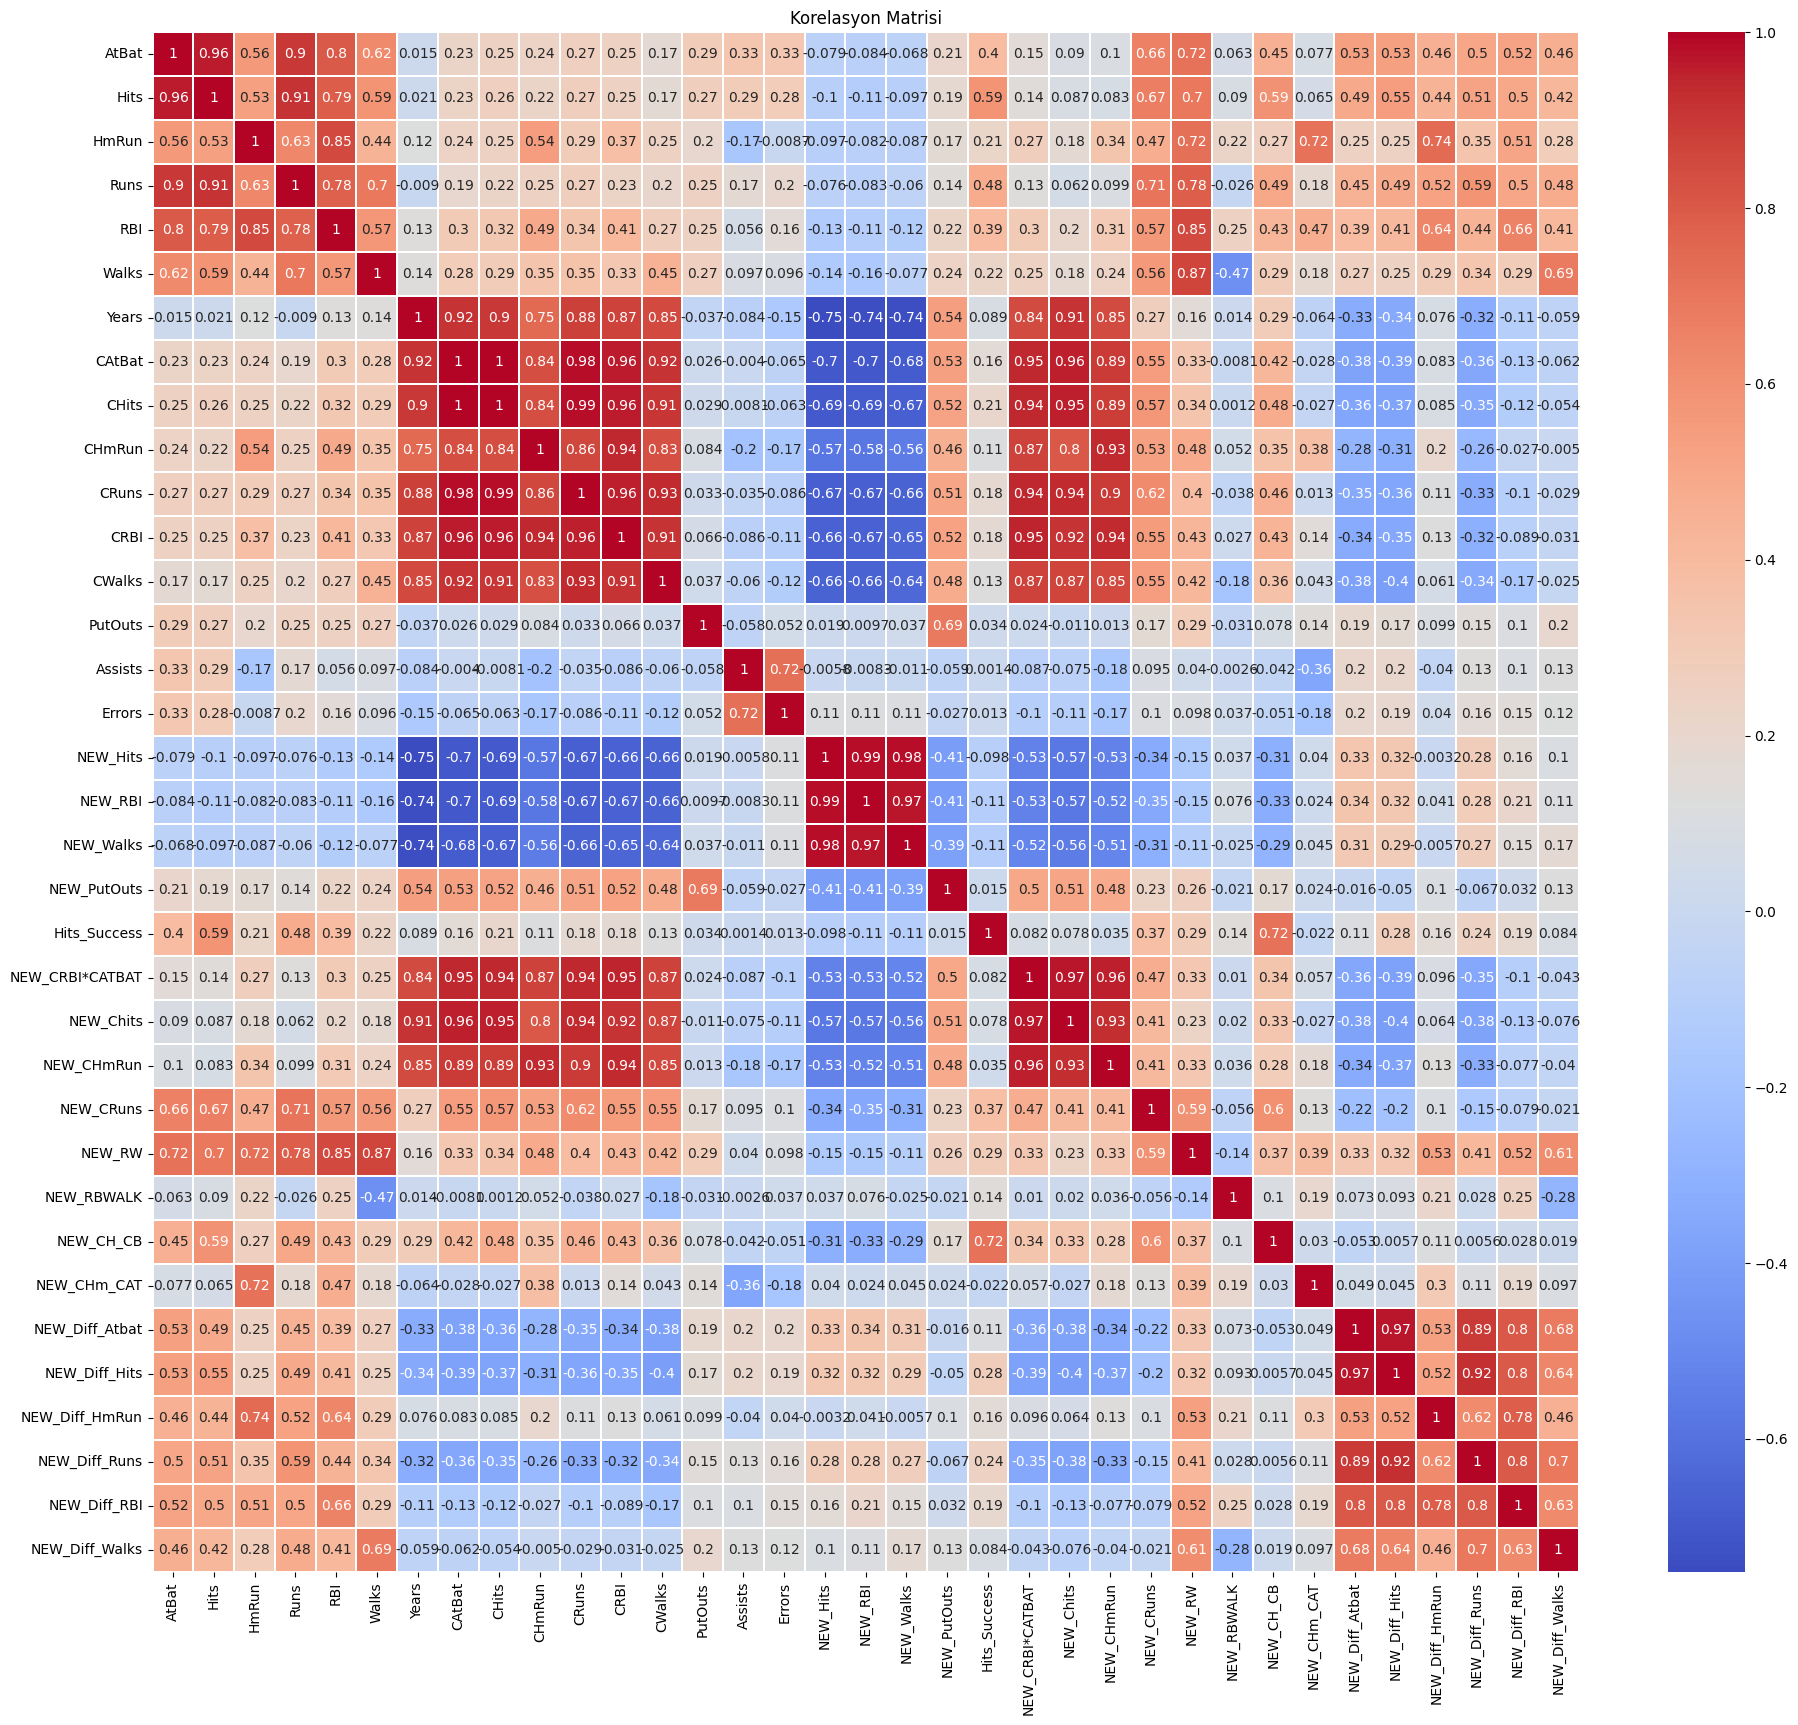

In [ ]:
# İlk olarak numericleri almak için bir değişkene attım.
numeric_df = x.select_dtypes(include=['float64', 'int64'])

# 2. Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

# 3. Korelasyon matrisini görselleştiricem seeaborn ve matplotlib kullanarak.
#       figsize'ı bilerek büyük aldım ki okunurluk artsın.
plt.figure(figsize=(23, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.1)
plt.title("Korelasyon Matrisi")
plt.show()

Muazzam ilişkiler(multikolineerlik) gözler önünde.



In [ ]:
# Yüksek korelasyonlu çiftleri tespit ettirmek için bu kodu yazıyorum. Boş bir liste açtım.
high_corr_pairs = []

# For range kullandım çünkü range() sayısal olarak indeks üretir. bu sayede her satırı tek tek gezip değer okuyabiliriz.
# len fonksiyonu ise bize değişken/sütun sayısını bulur. tüm değişkenleri gezip range fonksiyonuyla da satır satır incelerizzz.
# Sadece üst üçgeni kontrol etsin diyorum (çiftleri tekrar yazmamak için). aynısına bakmasın diye i+1 liyorum.
# feature1 Korelasyon matrisinin i indeksli sütun adını alır. Yani birinci değişkenin adını. Diğeri de 2. değişkeni
# corr_value Bu iki değişkenin kesiştiği noktadaki korelasyon değerini alır. (i ve j satır/sütun kesişimi)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]

# abs(...): Mutlak değer fonksiyonu imiş ynei öğrendim. Eksi veya artı fark etmeksizin değerin büyüklüğünü alıcak.
        if abs(corr_value) > 0.70:
            high_corr_pairs.append(f"{feature1}-{feature2} ({corr_value:.2f})")

# Sonuçları yazdırıyorum. Düz for döngüsü kullandım. Oluşturduğum listenin içinde dönsün bana tek tek değerleri yazdırsın.
print("\nYüksek korelasyona sahip özellik çiftleri (|r| > 0.70):")
for pair in high_corr_pairs:
    print(pair)


Yüksek korelasyona sahip özellik çiftleri (|r| > 0.70):
AtBat-Hits (0.96)
AtBat-Runs (0.90)
AtBat-RBI (0.80)
AtBat-NEW_RW (0.72)
Hits-Runs (0.91)
Hits-RBI (0.79)
HmRun-RBI (0.85)
HmRun-NEW_RW (0.72)
HmRun-NEW_CHm_CAT (0.72)
HmRun-NEW_Diff_HmRun (0.74)
Runs-RBI (0.78)
Runs-NEW_CRuns (0.71)
Runs-NEW_RW (0.78)
RBI-NEW_RW (0.85)
Walks-NEW_RW (0.87)
Years-CAtBat (0.92)
Years-CHits (0.90)
Years-CHmRun (0.75)
Years-CRuns (0.88)
Years-CRBI (0.87)
Years-CWalks (0.85)
Years-NEW_Hits (-0.75)
Years-NEW_RBI (-0.74)
Years-NEW_Walks (-0.74)
Years-NEW_CRBI*CATBAT (0.84)
Years-NEW_Chits (0.91)
Years-NEW_CHmRun (0.85)
CAtBat-CHits (1.00)
CAtBat-CHmRun (0.84)
CAtBat-CRuns (0.98)
CAtBat-CRBI (0.96)
CAtBat-CWalks (0.92)
CAtBat-NEW_Hits (-0.70)
CAtBat-NEW_CRBI*CATBAT (0.95)
CAtBat-NEW_Chits (0.96)
CAtBat-NEW_CHmRun (0.89)
CHits-CHmRun (0.84)
CHits-CRuns (0.99)
CHits-CRBI (0.96)
CHits-CWalks (0.91)
CHits-NEW_CRBI*CATBAT (0.94)
CHits-NEW_Chits (0.95)
CHits-NEW_CHmRun (0.89)
CHmRun-CRuns (0.86)
CHmRun-CRBI (0

In [ ]:
x.head()
# Galiba standart scale yapılmış daha önce verilerden öyle anladım.

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,-0.602900,-0.595675,-0.529975,-1.207183,-0.522128,-0.096826,1.408945,0.373366,0.200587,0.109509,...,-0.272565,-0.003834,0.092772,-0.280053,-0.472938,-0.213465,0.154611,True,True,True
2,0.512542,0.492260,0.738195,0.442494,0.794576,1.614738,-0.905036,-0.460668,-0.418475,0.011934,...,1.012006,-1.149114,-1.228948,-1.282599,-1.009645,-1.676331,-1.500668,False,True,False
3,0.628167,0.736490,0.968772,0.403216,1.026936,-0.189343,0.777859,1.369180,1.412506,2.304938,...,0.837941,-0.740787,-0.619326,-0.402001,-1.098162,-0.598802,-0.358041,True,False,True
4,-0.562092,-0.462459,-0.184110,-0.618013,-0.367222,-0.513153,-1.115398,-1.021870,-1.001506,-0.817450,...,0.431502,0.471475,0.550872,0.101198,0.294723,0.402771,0.243729,True,False,True
5,1.294712,1.358167,-0.875840,0.756718,-0.018682,-0.281860,0.777859,0.811634,0.688630,-0.703613,...,-1.345732,1.085953,1.443302,-0.240259,1.036259,0.487560,0.511532,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hiçbir şeye dokunmadan modeli eğitime alıcam.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model oluşturma
lr_model = LinearRegression()

# Modeli eğitme
lr_model.fit(x_train, y_train)

# Test seti ile tahmin yapma
y_pred = lr_model.predict(x_test)

# Performans değerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


# Sonuçları yazdıralım
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print("RMSE:", rmse)

MAE: 151.27888206486585
MSE: 42335.518493628144
R²: 0.6982013292210919
RMSE: 205.75596830621498


R² neredeyse %70 fena değil. Lakin MSE ve RMSE arasında dağlar var. Yani model yeterli bir performansta değil. MAE ve RMSE’nin arasındaki fark çok büyük değil Bu da demek oluyor ki modelin çok uç noktaları fazla yok. Aşırı outlier durumu gözlemlenmemiş. ama iyileştiricez.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Ridge regresyon modeli
ridge_params = {'alpha': np.logspace(-3, -2, 30)}  # Alpha değerleri için geniş bir aralık
ridge = Ridge(max_iter=10000)


#ridgemodelini değişkene atadım.
ridge = Ridge()


ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)  # Çapraz doğrulama ile en iyi alpha değerini bulma
ridge_grid.fit(x_train, y_train)

# En iyi Ridge modeli
best_ridge = ridge_grid.best_estimator_

# Ridge katsayılarını alma
ridge_coefficients = best_ridge.coef_

# Test setinde tahmin yapma
y_pred_ridge = best_ridge.predict(x_test)

# Performans değerlendirmesi
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
ridge_best_alpha = ridge_grid.best_params_['alpha']

# Sonuçları yazdır
print(f"Ridge Modeli (En iyi Alpha: {ridge_best_alpha}):")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R^2 Skoru: {r2_ridge:.2f}")
print("Ridge Katsayıları:", ridge_coefficients)

Ridge Modeli (En iyi Alpha: 0.01):
Mean Squared Error (MSE): 42325.88
R^2 Skoru: 0.70
Ridge Katsayıları: [-503.02960196  411.71973005   27.97847936   23.29749027  -58.54093847
  -37.55489091 -234.37756573  -93.45810302  811.38423871   66.28708597
  -17.78533099   73.71812128  117.79093263  -13.97985016  -15.95705588
   13.97346761  -23.32226869  -93.22944499   63.5184321    96.5796503
  -89.89730883 -269.33103027 -329.76764535   46.68096565   24.51099761
  158.34151674   45.17344736   -7.27168607  -28.18870666  255.17103321
 -127.63346039  -17.94158744    4.53021398  -21.47771193  -12.91598553
   80.8908022   -30.68308148  -33.13512977]


1.) Hiperparametrem(-3,3,50) iken R2: 0.60

Sebebi: alpha değerlerim büyük → model fazla ceza yiyor ve basitleşiyor. Öğrenemiyor. Aphayı küçültmem lazım.


2.) Hiperparametrem(-3,3,20) iken R2: 0.61


3.) (-4, 0, 30) : 0.66

4.) (-4, -1, 30) : 0.70 ama bundan sonra aradaki farkı azaltsam da değişmiyor

5.) ama bu 1.yi arttırdığımda -3'e R2 aynı kalsa da MSE i daha iyi eprformans veriyor.  

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ölçekleme
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Lasso ve alpha aralığı
lasso_params = {'alpha': np.logspace(-4, 0, 50)}
lasso = Lasso(max_iter=10000)

# Grid Search
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)
lasso_grid.fit(x_train_scaled, y_train)

# En iyi model ve tahmin
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(x_test_scaled)

# Değerlendirme
print(f"Lasso Modeli (En iyi Alpha: {lasso_grid.best_params_['alpha']}):")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lasso):.4f}")
print("Katsayılar:", best_lasso.coef_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.117e+05, tolerance: 2.637e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.502e+06, tolerance: 2.755e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.796e+05, tolerance: 2.671e

Lasso Modeli (En iyi Alpha: 1.0):
MSE: 51218.84
R²: 0.6349
Katsayılar: [-115.77359031   13.25278727   -0.           15.05728303  -51.4888966
  -30.66515177 -152.59429221   -0.          652.3338981    93.80599497
   48.54975891    0.           62.13884144    5.87034768   -7.16790624
    6.50377404   -0.          -46.02422884   -0.           78.11942512
  -47.25075608 -117.27233503 -414.10556503   -0.            0.
  164.66438184   31.76075305   52.45136518   -9.89476391   37.51023363
   75.15827774   -2.11199577    0.          -31.9136985   -13.37127905
   34.74675817  -16.31113909  -12.87461623]


burada ise birçok katsayı 0 olmuş. Model önemli özellikleri de silmiş. Evet multikolineerlik vardı ama model feature selectionı çok güçlü yaptığından önemli özellikler de silinmiş ve underfit olmuş neredeyse.

🧨 Alpha büyürse ne olur?
Ceza terimi büyür.
Model, bazı katsayıları 0 yaparak cezayı azaltmaya çalışır.

Diyelim beta1 = 20, beta2 = 0.001, beta3 = -0.05

Alpha = 0.0001 → cezalar küçük → model serbest

Alpha = 1 → cezalar artar → model şöyle der:

"Hmm... Bu küçük katsayıların etkisi az, ama cezada yük yapıyorlar.
En iyisi bunları sıfırlayayım."

**Lasso Neden R²'yi Artıramaz?**

Lasso'nun başarısı, şu iki duruma bağlıdır:

Özelliklerin çoğu gereksizse, Lasso çok faydalı.

Ama özelliklerin çoğu önemliyse, Lasso onları da budar.

veride büyük ihtimalle:

Özellikler gerçekten önemli (multicollinearity var ama bilgi taşıyor),

Bu yüzden Lasso budadıkça model kötüleşiyor.

In [ ]:
## bu kısma çok fazla yorum ekleyemiyorum. pipeline i deatylı araştırmam lazım.


from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 1. VERİ ÖN İŞLEME
# Ölçeklendirme (scaling) için StandardScaler ekliyoruz
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 2. POLİNOM DERECESİ VE MODEL OPTİMİZASYONU
# Optimize edilmiş parametreler
best_degree = 2  # Bu değeri cross-validation ile bulabilirsiniz
best_ridge_alpha = 1.0  # GridSearch ile optimize edilebilir
best_lasso_alpha = 0.01  # Daha düşük alpha deniyoruz

# 3. YENİ PIPELINE'LAR (Ölçeklendirme eklenmiş)
models = {
    "Polynomial Linear Regression": Pipeline([
        ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('linear', LinearRegression())
    ]),

    "Polynomial Ridge Regression": Pipeline([
        ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=best_ridge_alpha))
    ]),

    "Polynomial Lasso Regression": Pipeline([
        ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=best_lasso_alpha, max_iter=10000))  # max_iter artırıldı
    ])
}

# 4. MODELLERİ EĞİTME VE DEĞERLENDİRME
results = []
for name, model in models.items():
    # Modeli eğit
    model.fit(x_train, y_train)

    # Tahmin yap
    y_pred = model.predict(x_test)

    # Metrikleri hesapla
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Sonuçları kaydet
    results.append({
        "Model": name,
        "MSE": mse,
        "R2 Score": r2,
        "Best Params": str(model.get_params())
    })

# 5. SONUÇLARI GÖRÜNTÜLEME
poly_results = pd.DataFrame(results)
print(poly_results[["Model", "MSE", "R2 Score"]])

# 6. EK OPTİMİZASYON ÖNERİLERİ (Opsiyonel)
# GridSearchCV ile otomatik optimizasyon için:
"""
param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': np.logspace(-4, 4, 20)
}

grid_search = GridSearchCV(models["Polynomial Ridge Regression"],
                         param_grid,
                         cv=5,
                         scoring='r2')
grid_search.fit(x_train, y_train)
print("En iyi parametreler:", grid_search.best_params_)
"""

                          Model            MSE  R2 Score
0  Polynomial Linear Regression  193067.776104 -0.376329
1   Polynomial Ridge Regression  126474.473267  0.098397
2   Polynomial Lasso Regression  180203.025593 -0.284620


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.567e+04, tolerance: 3.462e+03
  model = cd_fast.enet_coordinate_descent(


'\nparam_grid = {\n    \'poly__degree\': [1, 2, 3],\n    \'ridge__alpha\': np.logspace(-4, 4, 20)\n}\n\ngrid_search = GridSearchCV(models["Polynomial Ridge Regression"], \n                         param_grid, \n                         cv=5,\n                         scoring=\'r2\')\ngrid_search.fit(x_train, y_train)\nprint("En iyi parametreler:", grid_search.best_params_)\n'

Polinomda sonuçlar hiç hoş gelmedi. O yüzden polinomları seçmiyorum.

<Axes: >

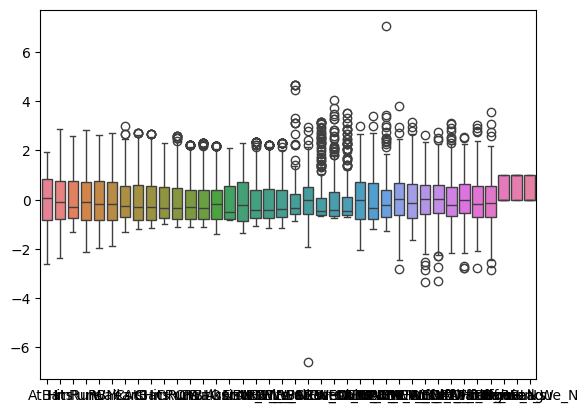

In [ ]:
sns.boxplot(data=x)

Sonuç olarak lasso modelini seçiyorum.  